# QC report: HILICpos Rafi only samples (R5pos, R5neg & Naive)
- Minghao Gong; 07/27/2022
- This notebook specifically fits Asari run

# Load libraries

In [7]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [8]:
#load libraries 
shhh <- suppressPackageStartupMessages # It's a library, so shhh!
shhh(library(FactoMineR))
shhh(library(factoextra))
shhh(library(reshape2))
shhh(library(tidyverse))
shhh(library(RColorBrewer))
shhh(library(gridExtra))
shhh(library(pheatmap))
library(repr)#jupyter notebook R ; image manipulation 
#shhh(library(devtools))
#install_github("vqv/ggbiplot")
shhh(library(ggbiplot))
options(warn=-1)#dont show warnings in Output 
options(digits = 14) # Or any higher number; fixing decimal places

library("rjson")

source('./utilis/utlis_MQC.R')

# Read tables

## load Metadata & feature table
- Here first use the peak Area table

# !!! What meta/feature/filtered tables in use?
- HILICpos

In [9]:
meta_path <- "../../input/sequence_file/clean_meta_df_wt1_HILICpos.csv"
featab_path <- "../../input/HILICpos_mzML/output_asari_project_223172519/preferred_Feature_table.tsv"
# filtered_featab_path <- "../../output/asari_prep_HILICpos_10//blankM_groupFil0.4_HILICpos_featab.csv"

#### Read metadata table

In [10]:
# metadata information
meta_df <- read_csv(meta_path)

Rows: 24 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): tID, Sample ID, tID_dedup, class, biological_samples
dbl (2): index, cell_number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
head(meta_df)

index tID           Sample ID       tID_dedup    class     
1  0    nist_1        nist_1          nist         nist      
2  2    nist_3        nist_3          nist         nist      
3  4    nist_5        nist_5          nist         nist      
4 12    q3June2014_1b q3June2014_1b_1 q3June2014_1 q3June2014
5 14    q3June2014_1b q3June2014_1b_3 q3June2014_1 q3June2014
6 16    q3June2014_1b q3June2014_1b_5 q3June2014_1 q3June2014
  biological_samples cell_number
1 No                 NA         
2 No                 NA         
3 No                 NA         
4 No                 NA         
5 No                 NA         
6 No                 NA

#### Read in the feature table
- Of note, since it is using tibble, row.names are suppressed; `COMP ID` comes as the first columns

In [12]:
asari_df <- read_delim(featab_path,delim = '\t')

Rows: 9756 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): id_number
dbl (34): mz, rtime, rtime_left_base, rtime_right_base, parent_masstrack_id,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
asari2data_feat_df_regExpr <- function(asari_df,regExpr_sample_cols) {
    sample_col_index = grep(regExpr_sample_cols,colnames(asari_df))
    featab_df = asari_df[,c(1,sample_col_index)]
    return(featab_df)
}

asari2data_feat_df_index <- function(asari_df,end_index = 11) {
    featab_df = asari_df[,c(1,end_index:ncol(asari_df))]
    return(featab_df)
}

In [14]:
featab_df = asari2data_feat_df_regExpr(asari_df,"Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]")

In [15]:
dim(featab_df)

[1] 9756   13

In [16]:
head(featab_df) # examine the table

id_number G1_Naive_1_300_1 G1_Naive_2_300_1 G1_Naive_3_300_1 G2_R5pos_1_142_1
1 F1             0                0                0                0          
2 F5             0                0                0                0          
3 F6        163014           185168           311919           133599          
4 F7        134222            44310           101329            80291          
5 F8             0                0                0                0          
6 F9             0                0                0                0          
  G2_R5pos_2_200_1 G2_R5pos_3_150_1 G3_R5neg_1a_655_1 G3_R5neg_1b_655_1
1      0                0                0                 0           
2      0                0                0                 0           
3 101565           110948           368629            137644           
4 136212            83206           367391            130567           
5      0                0                0                 0           
6      0                0                0                 0           
  G3_R5neg_2a_687_1 G3_R5neg_2b_687_1 G3_R5neg_3a_865_1 G3_R5neg_3b_865_1
1      0                 0                 0                 0           
2      0                 0                 0                 0           
3 103785            334050            410553            282564           
4  65650            117937            166892            168016           
5      0                 0                 0                 0           
6      0                 0                 0                 0

### subset metadatabased on feature table

In [17]:
colnames(featab_df)

[1] "id_number"         "G1_Naive_1_300_1"  "G1_Naive_2_300_1" 
 [4] "G1_Naive_3_300_1"  "G2_R5pos_1_142_1"  "G2_R5pos_2_200_1" 
 [7] "G2_R5pos_3_150_1"  "G3_R5neg_1a_655_1" "G3_R5neg_1b_655_1"
[10] "G3_R5neg_2a_687_1" "G3_R5neg_2b_687_1" "G3_R5neg_3a_865_1"
[13] "G3_R5neg_3b_865_1"

In [18]:
pull(meta_df['Sample ID']) # tibble column needs to pull out into vector

[1] "nist_1"            "nist_3"            "nist_5"           
 [4] "q3June2014_1b_1"   "q3June2014_1b_3"   "q3June2014_1b_5"  
 [7] "G2_R5pos_1_142_1"  "G2_R5pos_2_200_1"  "G2_R5pos_3_150_1" 
[10] "G1_Naive_1_300_1"  "G1_Naive_2_300_1"  "G1_Naive_3_300_1" 
[13] "G3_R5neg_1a_655_1" "G3_R5neg_1b_655_1" "G3_R5neg_2a_687_1"
[16] "G3_R5neg_2b_687_1" "G3_R5neg_3a_865_1" "G3_R5neg_3b_865_1"
[19] "q3June2014_2a_1"   "q3June2014_2a_3"   "q3June2014_2a_5"  
[22] "q3June2014_2b_1"   "q3June2014_2b_3"   "q3June2014_2b_5"

In [19]:
meta_df = meta_df[pull(meta_df['Sample ID']) %in% colnames(featab_df),]

#### procedure for preoprocessing of data
- log2-transformation (currently the missing data is denoted by NA)
- Analysis the TIC
- Correlation heatmap

In [20]:
log2transform <- function(featab_df) {
    featab_df[featab_df == 0] = NA
    featab_df.log <- cbind(featab_df[,1],log2(featab_df[, 2:ncol(featab_df)])) # no need to add +1
    # featab_df.log[is.na(featab_df.log)] = 0
    return(featab_df.log)
}

In [21]:
# separate the annotation and feature values part and do log2 conversion
featab_df.log <- log2transform(featab_df) # no need to add +1
head(featab_df.log)

id_number G1_Naive_1_300_1 G1_Naive_2_300_1 G1_Naive_3_300_1 G2_R5pos_1_142_1
1 F1                     NA               NA               NA               NA 
2 F5                     NA               NA               NA               NA 
3 F6        17.314636346030  17.498475273736  18.250811909069  17.027549683593 
4 F7        17.034261633975  15.435344706373  16.628687601870  16.292950661401 
5 F8                     NA               NA               NA               NA 
6 F9                     NA               NA               NA               NA 
  G2_R5pos_2_200_1 G2_R5pos_3_150_1 G3_R5neg_1a_655_1 G3_R5neg_1b_655_1
1              NA               NA               NA                NA  
2              NA               NA               NA                NA  
3 16.632043799522  16.759524135518  18.491810046519   17.070582197636  
4 17.055494281883  16.344399944672  18.486956759530   16.994430785163  
5              NA               NA               NA                NA  
6              NA               NA               NA                NA  
  G3_R5neg_2a_687_1 G3_R5neg_2b_687_1 G3_R5neg_3a_865_1 G3_R5neg_3b_865_1
1              NA                NA                NA                NA  
2              NA                NA                NA                NA  
3 16.663238421125   18.349704533284   18.647208951986   18.108218145594  
4 16.002507390668   16.847656875895   17.348555274932   17.358239100426  
5              NA                NA                NA                NA  
6              NA                NA                NA                NA

In [22]:
dim(featab_df.log)

[1] 9756   13

### Overall Density Distribution of data 
  

- first two columns are gona be mz and rt and rest should be the samples ; nothing else 

- two parameters needed : 
  - data : - Data can be log2(prefferably) /linear; if have nas will be imputed to calulate density
  
  - y_lim_param; to adjust height of y axis(desnity) in the plot; later to automate it may be 
  

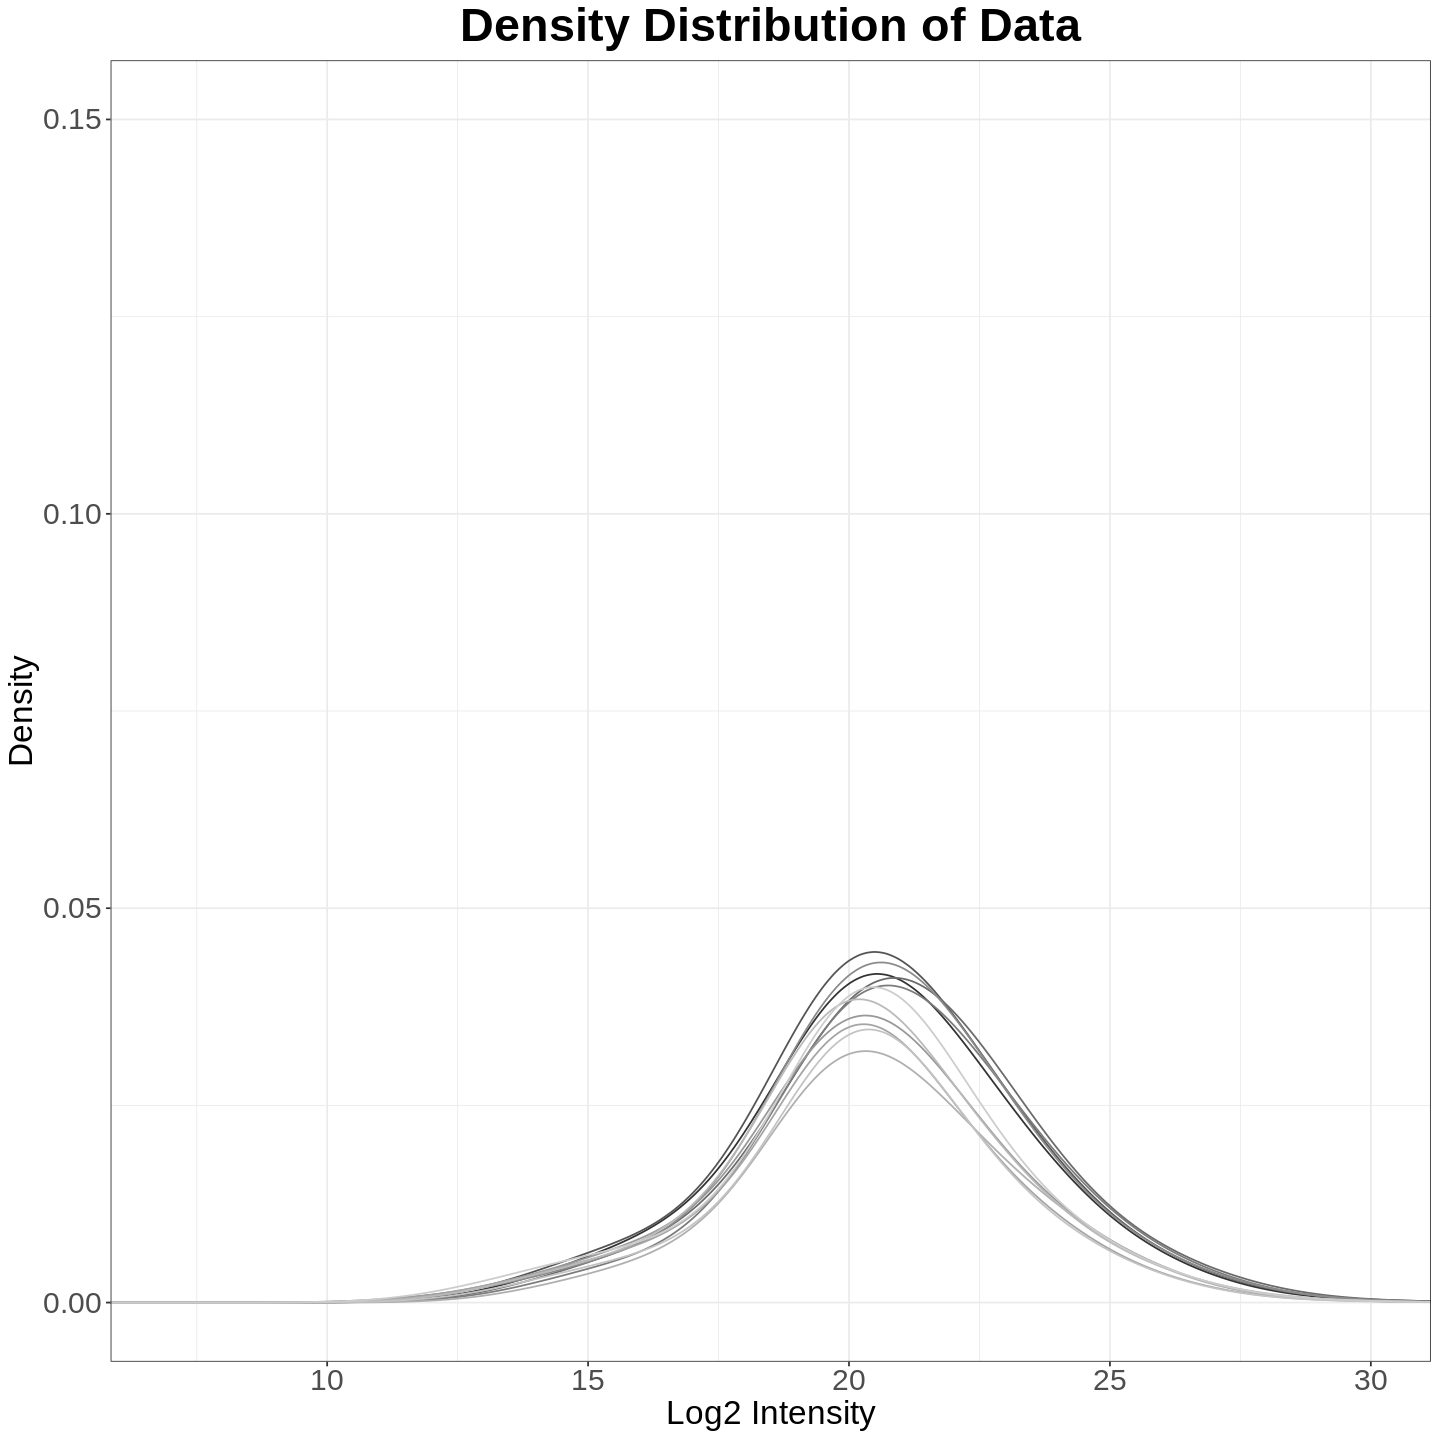

In [23]:
options(repr.plot.width=12, repr.plot.height=12, res=200)
suppressMessages(custom_density_plot(featab_df.log[,2:ncol(featab_df.log)], 
                                     y_lim_param=0.15))

### Mean TIC ACross Samples 

Input:

- data ; if nas ; willl be imputed for 0s within the function because we need to take into account the missing values in each sample to properly detect low intensity samples 
- optional ; metadata ; if present will factor color it ; if not then will not 


Note ; if x-axis need be changed for fontsize ; use   axis.title.x = element_text( size=16) in plotMeanTic function to control;

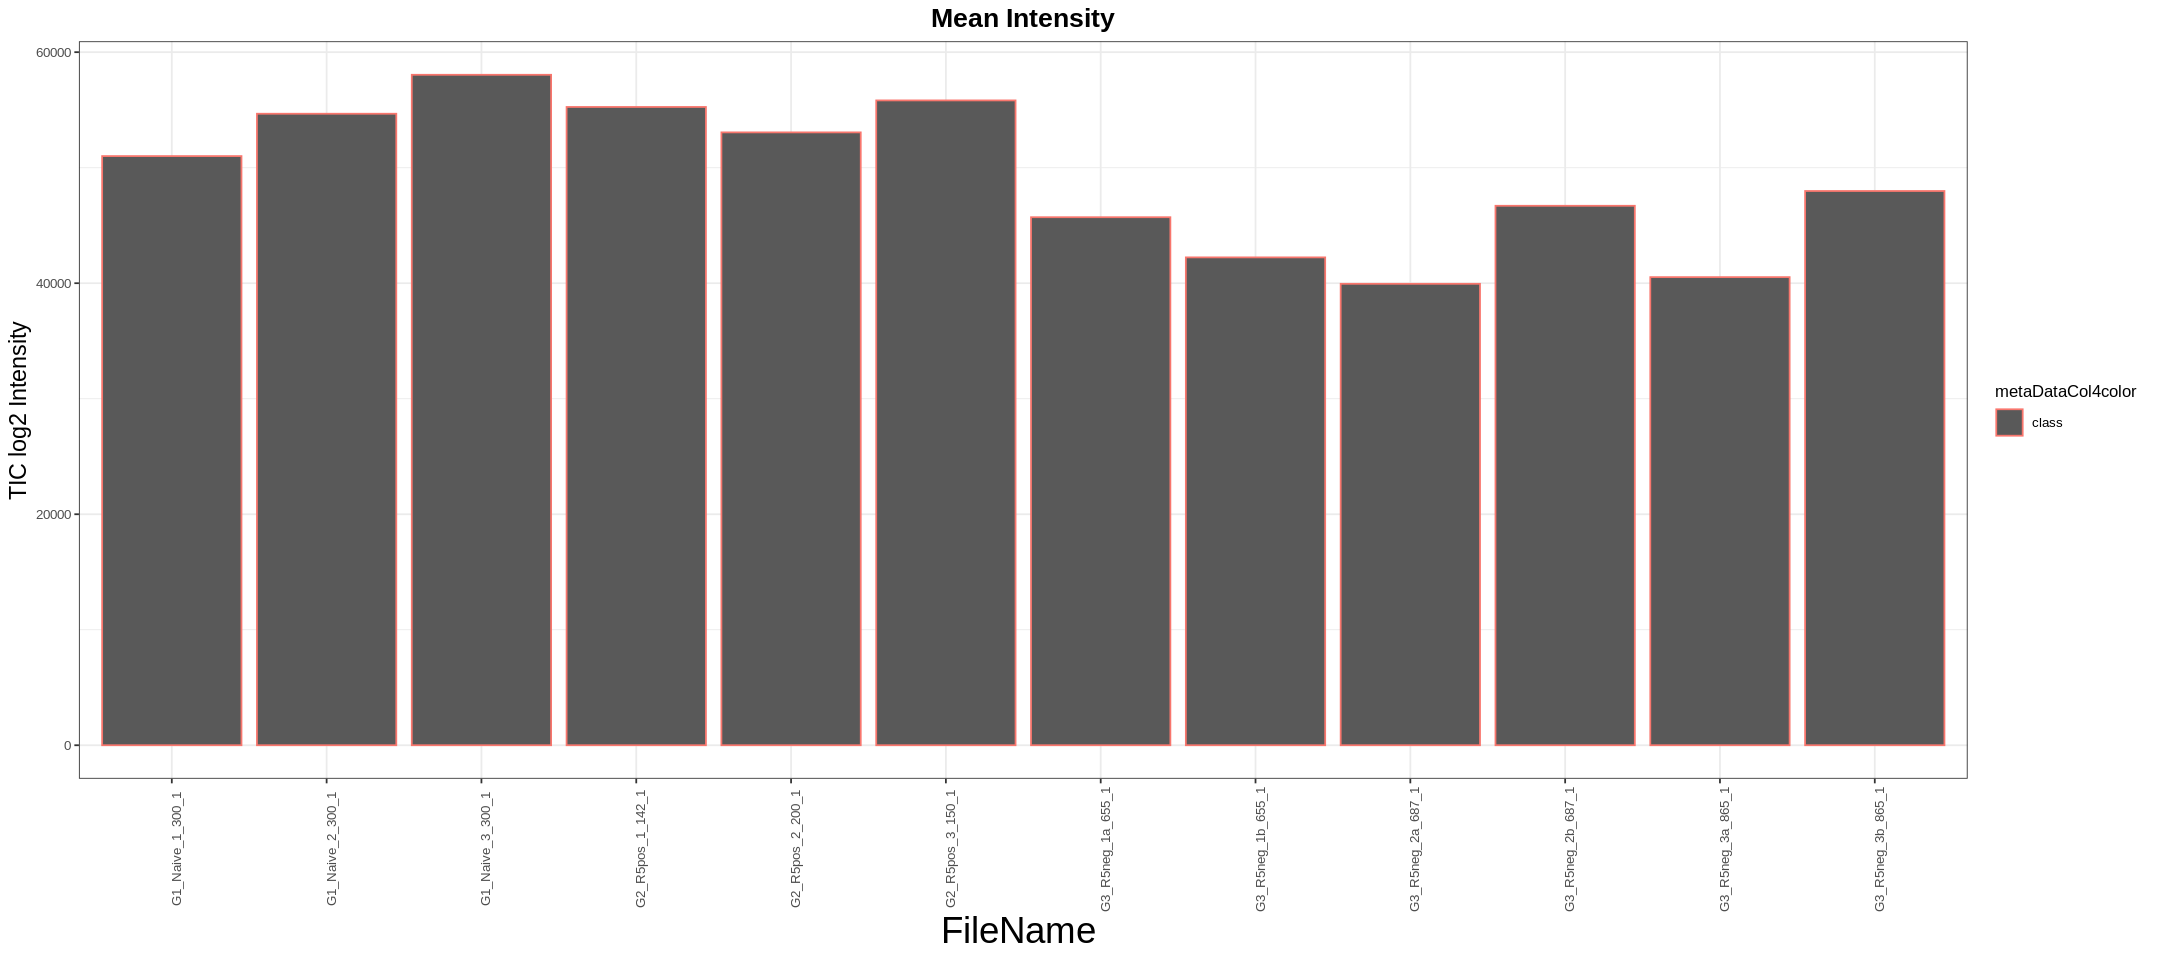

In [24]:
options(repr.plot.width=18, repr.plot.height=8, res=200)
suppressMessages(plotTIC(featab_df.log,meta_df,"tID","class"))
#control xaxis font size;axis.title.x = element_text( size=16)

## Decide SD cutoff for outliers by yourself if need be

In [25]:
get_TIC_outliers(featab_df.log,2)

columnsum Sample.ID

### Missing values plot 

Input:

- logged 2/linear scale  data with nas ; no imputation happening in the function as i am counting Nas 


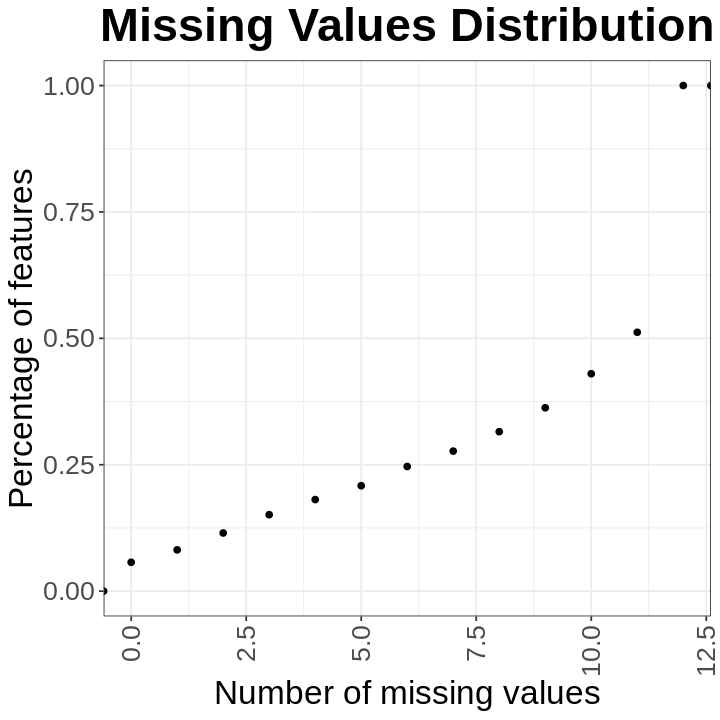

In [26]:
source('./utilis/utlis_MQC.R')
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = FALSE)

In [27]:
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = TRUE)

### Corelation bw samples 

In [28]:
# A function that help later step as correlation plot cannot handle very well with zero values
mssingValueAsNA <- TRUE # NA is good to skip this step
if (!mssingValueAsNA) {
    featab_df.log.NA <- featab_df.log
    featab_df.log.NA[featab_df.log == 0] <- NA  # Turn 0 into NA
    featab_df.log <- featab_df.log.NA
}

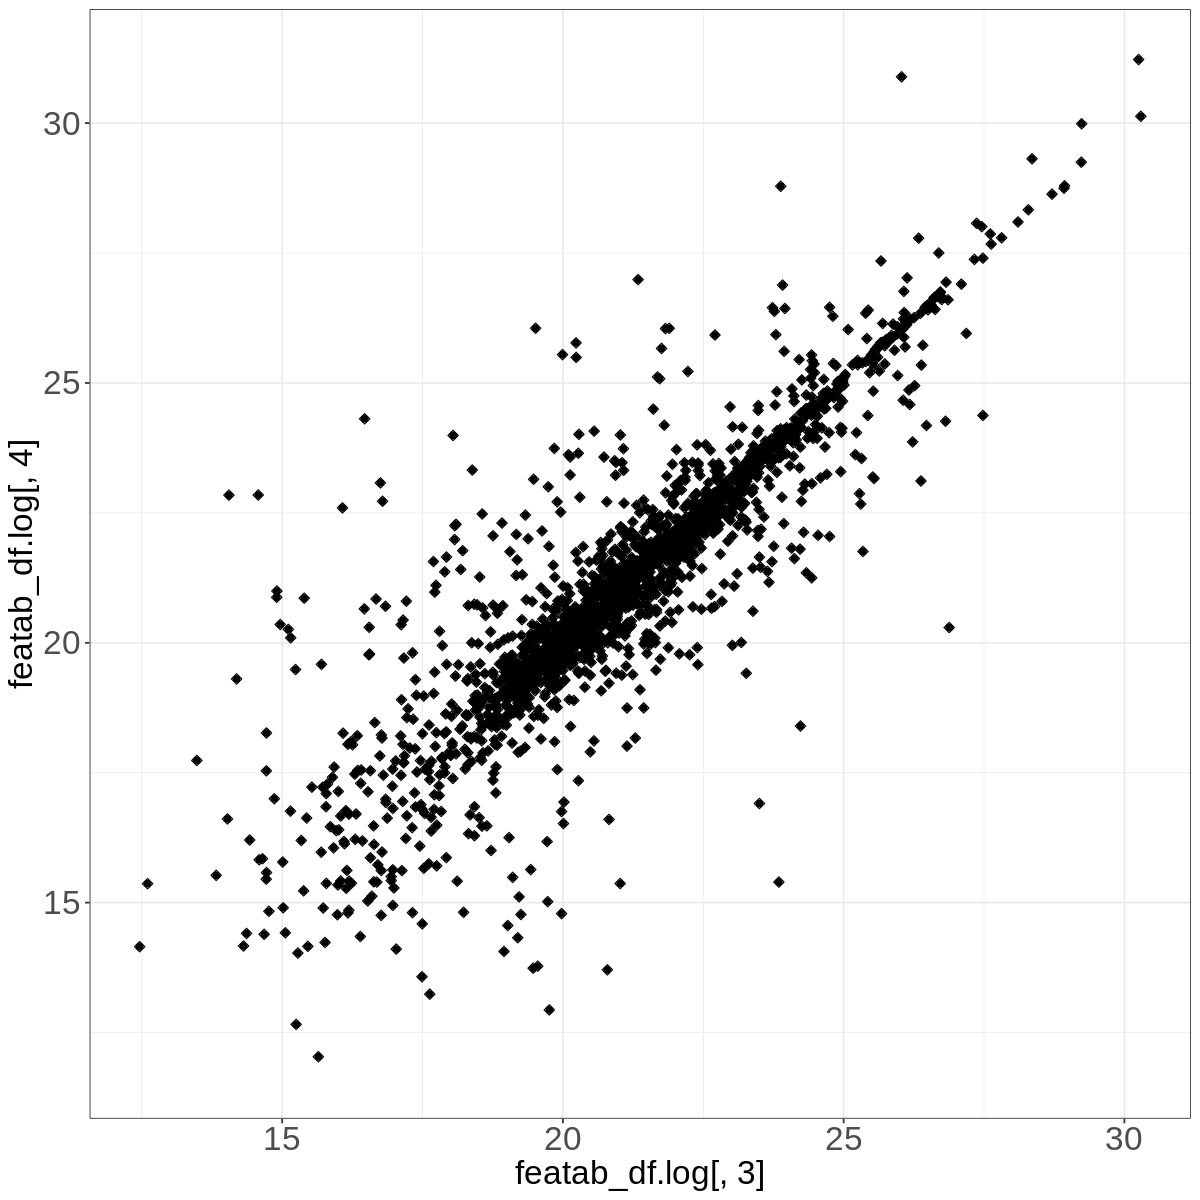

In [29]:
#options(repr.plot.width=16, repr.plot.height=20, res=200)
# reproducibility of injection replicates
#figure options ; change to the needs
options(repr.plot.width=10, repr.plot.height=10)
  ggplot(featab_df.log, aes(x=featab_df.log[,3], y=featab_df.log[,4])) + geom_point()+
  geom_point(size=2, shape=23) +# Change the point size, and shape
  theme_bw()+#axis settings 
    theme(axis.text=element_text(size=20))+
 #axis labels settings 
    theme(axis.title=element_text(size=20))

## Heatmap 

Input: 
- data; log2/linear scale data with nas 
- metadata is optional 
- metadata include what to colors.

WishList Note:  fix if metadata is not passed; debug

In [30]:
colnames(meta_df)

[1] "index"              "tID"                "Sample ID"         
[4] "tID_dedup"          "class"              "biological_samples"
[7] "cell_number"

In [31]:
options(repr.plot.width=15, repr.plot.height=12, res=300)
suppressMessages(plot_heatmap(featab_df.log, meta_df, "Sample ID","class"))

In [32]:
df.outliers <-  get_outliers_heatmap(featab_df.log)
options(repr.plot.width=15, repr.plot.height=10, res=300)
getoutliersplot(df.outliers)

In [33]:
filtered.df.outliers<-df.outliers %>% filter(SampleType=="outlier")
filtered.df.outliers

samples           columnmeancor    SampleType
G3_R5neg_3a_865_1 G3_R5neg_3a_865_1 0.66881923518278 outlier

# PCA

## Here if I use the unfiltered data

In [34]:
plotPCA(featab_df.log, meta_df, "Sample ID", "class", TRUE)

ERROR: Error in if (df.metadata == "nodata") {: the condition has length > 1


## Here I will use the filtered

In [ ]:
# filt_df <- read_csv(filtered_featab_path)

# filt_df = asari2data_feat_df(filt_df,'HEU\\_[0-9]+|HUU\\_[0-9]+')
# filt_df.log2 = log2transform(filt_df)

# ----

# colnames(meta_df)

# plotPCA(filt_df.log2, meta_df, "Sample.ID", "Group", TRUE)

------------

-----